In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

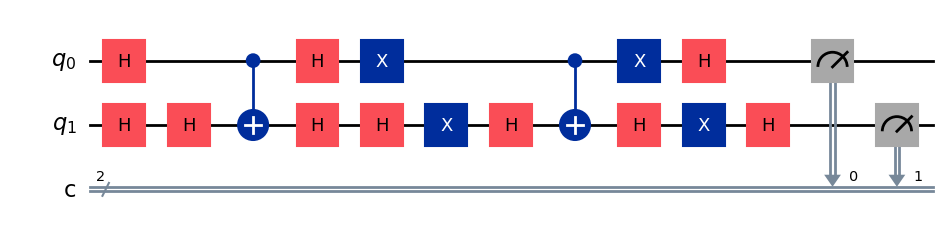

In [2]:
from qiskit import QuantumCircuit, transpil

circuit = QuantumCircuit(2,2)
#circuit.initialize("01")

#estado de superposición
circuit.h([0,1])
#esconder "la reina"
circuit.h(1)
circuit.cx(0,1)
circuit.h(1)

circuit.h([0,1])
circuit.x([0,1])

circuit.h(1)
circuit.cx(0,1)
circuit.h(1)

circuit.x([0,1])
circuit.h([0,1])

#medicion
circuit.measure([0,1], [0,1])
circuit.draw(output="mpl")

In [101]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import transpile

backend = service.least_busy(operational=True, simulator=False)
circuit = transpile(circuit, backend)
sampler = Sampler(backend)
job = sampler.run([circuit])
print(f"job id: {job.job_id()}")

PrimitiveResult([PubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})
